In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
print("Initial Dataset:")
print(df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Initial Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [10]:
if 'Cabin' in df.columns:
    df = pd.get_dummies(df, columns=['Cabin'], drop_first=True)
else:
    print("Column 'Cabin' not found in DataFrame.")

Column 'Cabin' not found in DataFrame.


In [12]:
# Fill missing values properly
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Drop columns only if they exist
df = df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], errors='ignore')

# Convert categorical column 'Embarked' to dummies
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

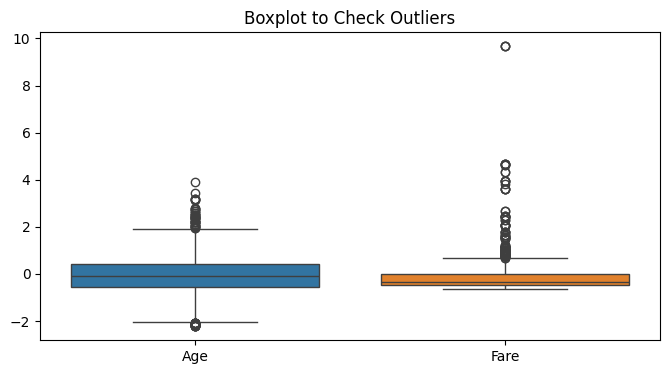

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot to Check Outliers")
plt.show()

In [15]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['Age', 'Fare']]))
df = df[(z_scores < 3).all(axis=1)]

print("\nCleaned Data:\n", df)


Cleaned Data:
      Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Ticket_110413  \
0           0       3  NaN -0.565736      1      0 -0.502445          False   
1           1       1  NaN  0.663861      1      0  0.786845          False   
2           1       3  NaN -0.258337      0      0 -0.488854          False   
3           1       1  NaN  0.433312      1      0  0.420730          False   
4           0       3  NaN  0.433312      0      0 -0.486337          False   
..        ...     ...  ...       ...    ...    ...       ...            ...   
886         0       2  NaN -0.181487      0      0 -0.386671          False   
887         1       1  NaN -0.796286      0      0 -0.044381          False   
888         0       3  NaN -0.104637      1      2 -0.176263          False   
889         1       1  NaN -0.258337      0      0 -0.044381          False   
890         0       3  NaN  0.202762      0      0 -0.492378          False   

     Ticket_110465  Ticket_110564  